In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sed_fitter import FitSED

In [8]:
bands = ['Su', 'Sg', 'Sr', 'Si', 'Sz']

fitsed = FitSED(atm_type = 'H', bands = bands)

Let's simulate a mock SED to fit, with T = 15000 K, logg = 8:

In [21]:
sigma = 0.025

observed_sed = fitsed.model_sed(15000, 8)
observed_sed += sigma * np.random.normal(size = len(observed_sed))

e_observed_sed = np.repeat(sigma, len(observed_sed))

Text(0.5, 0, 'Passband')

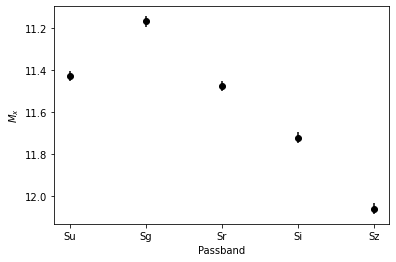

In [22]:
plt.errorbar(bands, observed_sed, yerr = e_observed_sed, color = 'k', linestyle = 'none', marker = 'o')
plt.gca().invert_yaxis()
plt.ylabel('$M_x$')
plt.xlabel('Passband')

Now we recover the atmospheric parameters using the SED fitter and nested sampling:

2825it [00:01, 1574.14it/s, +250 | bound: 14 | nc: 1 | ncall: 13734 | eff(%): 22.390 | loglstar:   -inf < -1.556 <    inf | logz: -11.381 +/-    nan | dlogz:  0.001 >  0.259]


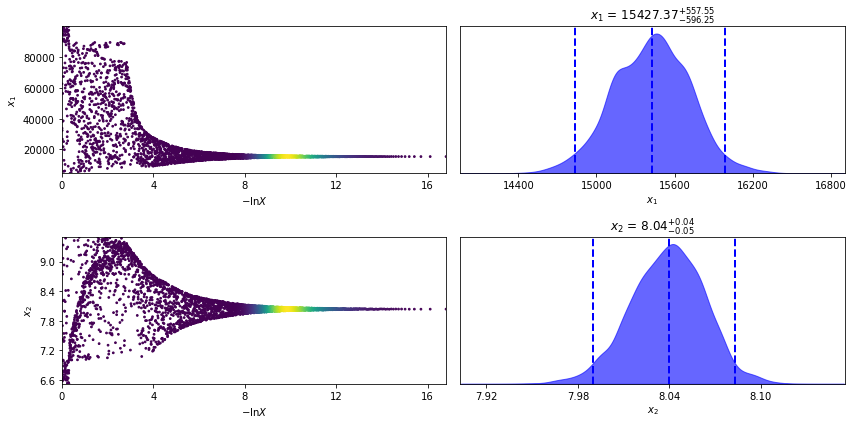

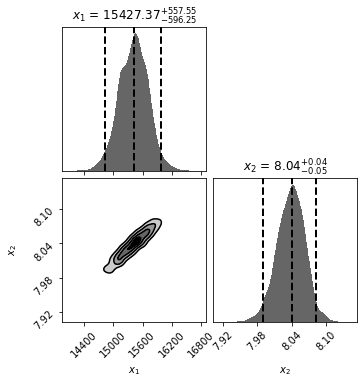

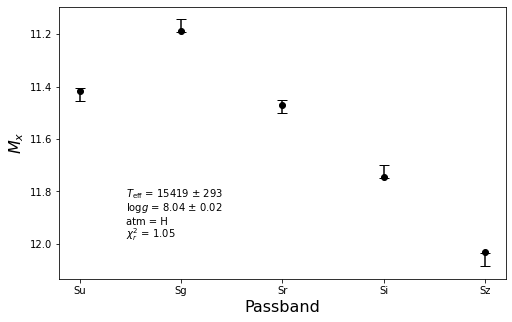

In [23]:
result = fitsed.fit_sed(observed_sed, e_observed_sed, plot_fit = True, plot_trace = True, plot_corner = True)